# Car Accidents Italy

Notebook for data analysis for car accidents in Italy.

**note** 
- Il dataset che avevamo trovato era delle _tabelle_, ovvero dei dati già analizzati. Si mostra quindi con dei metadati.
- Il dataset è troppo pesante per GitHub. È stato quindi messo in `.gitignore`.

**cose da fare**
- Calcolare indici di eterogeneità di Gini
- Controllare se sotto Natale ci sono più incidenti
- Dimostrare che le donne **non** sono più pericolose al volante degli uomini



In [1]:
dataset_proj <- read.csv("dataset/dataset progetto.csv", sep=';')

In [2]:
dataset_proj

anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,...,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
17,7,30,6,2,6,27,12,2,1,...,0,0,0,0,6,NA,6,12,900,2
17,7,66,1,2,3,26,12,2,1,...,0,0,0,0,1,NA,13,0,0,3
17,7,43,3,2,6,26,12,2,1,...,0,0,0,0,1,NA,15,69,100,4
17,7,24,1,2,8,0,12,2,1,...,0,0,0,0,1,NA,17,0,0,4
17,7,65,1,2,1,0,12,2,1,...,0,0,0,0,1,NA,10,0,0,4
17,7,73,7,2,6,26,12,2,1,...,0,0,0,0,2,NA,19,0,0,3
17,7,3,5,2,1,0,12,2,1,...,0,0,0,0,1,NA,15,0,0,1
17,7,65,4,2,1,0,12,2,1,...,0,0,0,0,1,NA,20,0,0,2
17,7,3,5,2,1,0,12,1,1,...,0,0,0,0,1,NA,16,0,0,2
17,7,58,1,2,6,26,12,2,1,...,0,0,0,0,1,NA,10,98,400,2


In [3]:
cat("Grandezza del dataset:",ncol(dataset_proj),"x",nrow(dataset_proj))

Grandezza del dataset: 117 x 174933

Andiamo a prendere un campione di dal dataset che viene fornito. Per modificare la grandezza del campione, si cambi `SAMPLE_SIZE`.

In [4]:
SAMPLE_SIZE = 20000

In [5]:
sample_rows <- sample(nrow(dataset_proj), SAMPLE_SIZE)

In [6]:
sample_data = dataset_proj[sample_rows,]

In [7]:
names(sample_data)

[1] "anno"                          "provincia"                    
  [3] "comune"                        "giorno"                       
  [5] "organo_di_rilevazione"         "localizzazione_incidente"     
  [7] "denominazione_della_strada"    "tronco_di_strada_o_autostrada"
  [9] "tipo_di_strada"                "pavimentazione"               
 [11] "intersezione_o_non_interse3"   "fondo_stradale"               
 [13] "segnaletica"                   "condizioni_meteorologiche"    
 [15] "natura_incidente"              "tipo_veicolo_a"               
 [17] "tipo_veicoli__b_"              "tipo_veicolo__c_"             
 [19] "veicolo__a____circostanze_10"  "veicolo__a____circostanze_11" 
 [21] "veicolo__b____circostanze_13"  "veicolo__b____circostanze_14" 
 [23] "veicolo__a___anno_immatric18"  "immatricolazione_veicolo__b_" 
 [25] "immatricolazione_veicolo__c_"  "veicolo__a___et__conducente"  
 [27] "veicolo__a___sesso_conducente" "veicolo__a___esito_conducente"
 [29] "veicolo__a___patente_condu29"  "veicolo__a___anno_rilascio30" 
 [31] "veicolo__a___passeggeri_an35"  "veicolo__a___et__passegger36" 
 [33] "veicolo__a___sesso_passegg37"  "veicolo__a___esito_passegg38" 
 [35] "veicolo__a___et__passegger39"  "veicolo__a___sesso_passegg40" 
 [37] "veicolo__a___esito_passegg41"  "veicolo__a___et__passegger42" 
 [39] "veicolo__a___sesso_passegg43"  "veicolo__a___esito_passegg44" 
 [41] "veicolo__a___et__passegger45"  "veicolo__a___sesso_passegg46" 
 [43] "veicolo__a___altri_passegg47"  "veicolo__a___altri_passegg48" 
 [45] "veicolo__a___altri_passegg49"  "veicolo__a___altri_passegg50" 
 [47] "veicolo__b___et__conducente"   "veicolo__b___sesso_conducente"
 [49] "veicolo__b___esito_conducente" "veicolo__b___patente_condu51" 
 [51] "veicolo__b___anno_rilascio52"  "veicolo__b___passeggeri_an57" 
 [53] "veicolo__b___et__passegger58"  "veicolo__b___sesso_passegg59" 
 [55] "veicolo__b___esito_passegg60"  "veicolo__b___et__passegger61" 
 [57] "veicolo__b___sesso_passegg62"  "veicolo__b___esito_passegg63" 
 [59] "veicolo__b___et__passegger64"  "veicolo__b___sesso_passegg65" 
 [61] "veicolo__b___esito_passegg66"  "veicolo__b___et__passegger67" 
 [63] "veicolo__b___sesso_passegg68"  "veicolo__b___altri_passegg69" 
 [65] "veicolo__b___altri_passegg70"  "veicolo__b___altri_passegg71" 
 [67] "veicolo__b___altri_passegg72"  "veicolo__c___et__conducente"  
 [69] "veicolo__c___sesso_conducente" "veicolo__c___esito_conducente"
 [71] "veicolo__c___patente_condu73"  "veicolo__c___anno_rilascio74" 
 [73] "veicolo__c___passeggeri_an79"  "veicolo__c___et__passegger80" 
 [75] "veicolo__c___sesso_passegg81"  "veicolo__c___esito_passegg82" 
 [77] "veicolo__c___et__passegger83"  "veicolo__c___sesso_passegg84" 
 [79] "veicolo__c___esito_passegg85"  "veicolo__c___et__passegger86" 
 [81] "veicolo__c___sesso_passegg87"  "veicolo__c___esito_passegg88" 
 [83] "veicolo__c___et__passegger89"  "veicolo__c___sesso_passegg90" 
 [85] "veicolo__c___altri_passegg91"  "veicolo__c___altri_passegg92" 
 [87] "veicolo__c___altri_passegg93"  "veicolo__c___altri_passegg94" 
 [89] "pedone_morto_1__sesso"         "pedone_morto_1__et_"          
 [91] "pedone_ferito_1__sesso"        "pedone_ferito_1__et_"         
 [93] "pedone_morto_2__sesso"         "pedone_morto_2__et_"          
 [95] "pedone_ferito_2__sesso"        "pedone_ferito_2__et_"         
 [97] "pedone_morto_3__sesso"         "pedone_morto_3__et_"          
 [99] "pedone_ferito_3__sesso"        "pedone_ferito_3__et_"         
[101] "pedone_morto_4__sesso"         "pedone_morto_4__et_"          
[103] "pedone_ferito_4__sesso"        "pedone_ferito_4__et_"         
[105] "altri_veicoli_coinvolti"       "morti_maschi_coinvolti_su_95" 
[107] "morti_femmine_coinvolti_su96"  "feriti_maschi_coinvolti_su97" 
[109] "feriti_femmine_coinvolti_s98"  "morti_entro_24_ore"           
[111] "morti_entro_30_giorni"         "feriti"                       
[113] "descrizione_strada"            "Ora"                          
[115] "chilo

In [8]:
attach(sample_data)

In [9]:
giorno <- factor(giorno)
levels(giorno) <- c("Lun", "Mar", "Mer", "Gio", "Ven", "Sab", "Dom")
incidenti_per_giorni = table(giorno)

In [10]:
levels(giorno)

[1] "Lun" "Mar" "Mer" "Gio" "Ven" "Sab" "Dom"

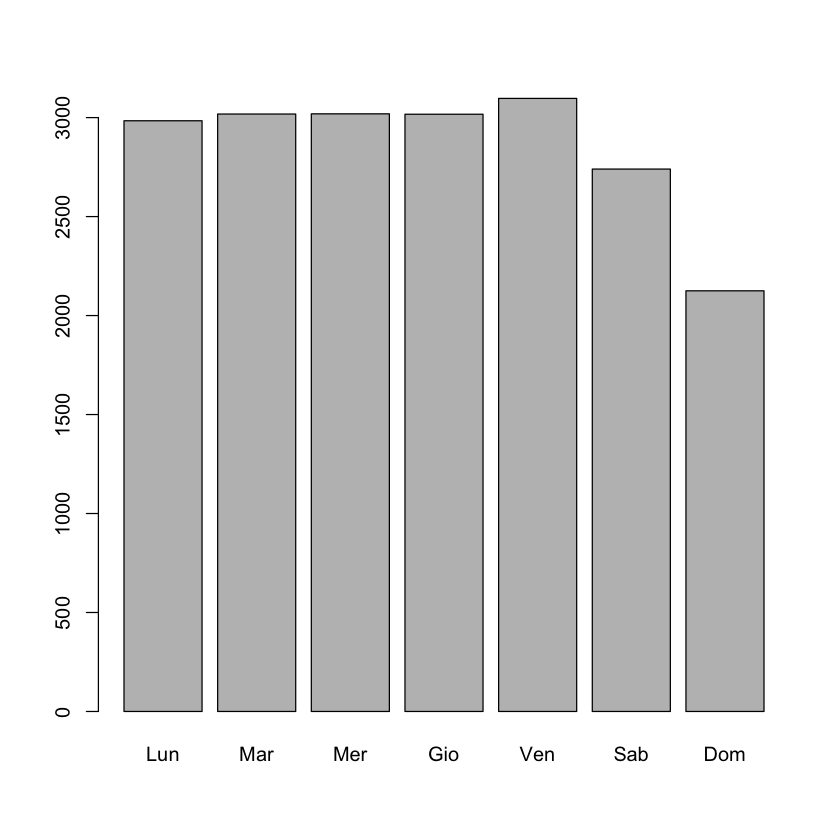

In [11]:
barplot(incidenti_per_giorni)

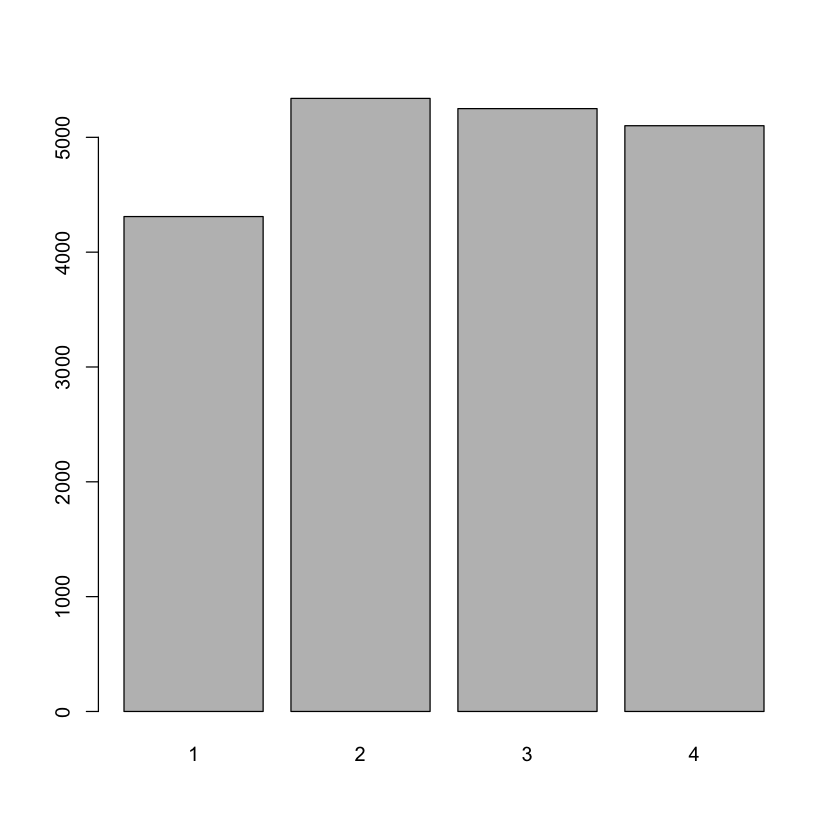

In [12]:
barplot(table(trimestre))

-----

Provo a creare una qualche tabella bivariata.

In [13]:
pavimentazione <- factor(pavimentazione)
levels(pavimentazione) <- c("good", "bad", "non-pav")

Provo a fare una nuova variabile per la localizzazione degli incidenti, nella quale distinguo solamente tra _urbana_, _extraurbana_ e _autostrada_. In questo modo si dovrebbe vedere meglio dove si ha una maggiore incidenza del fondo stradale messo male.

In [14]:
new_localizzazione_incidente = array(10, length(localizzazione_incidente))

In [15]:
for(i in 1:length(localizzazione_incidente))
{

    if(localizzazione_incidente[i] == 0 || localizzazione_incidente[i] == 1 || localizzazione_incidente[i] == 2 || localizzazione_incidente[i] == 3)    
    {
        new_localizzazione_incidente[i] = 0

    }
    if(localizzazione_incidente[i] == 4 || localizzazione_incidente[i] == 5 || localizzazione_incidente[i] == 6 || localizzazione_incidente[i] == 9)    
    {
        new_localizzazione_incidente[i] = 1
    }
    if(localizzazione_incidente[i] == 7)
    {
        new_localizzazione_incidente[i] = 2
    }
    
}

Controllo che effettivamente il numero di strade scartate coincida con quelle non considerate (ovvero `altro`).

In [16]:
length(which(new_localizzazione_incidente == 10)) == length(which(localizzazione_incidente==8))

[1] TRUE

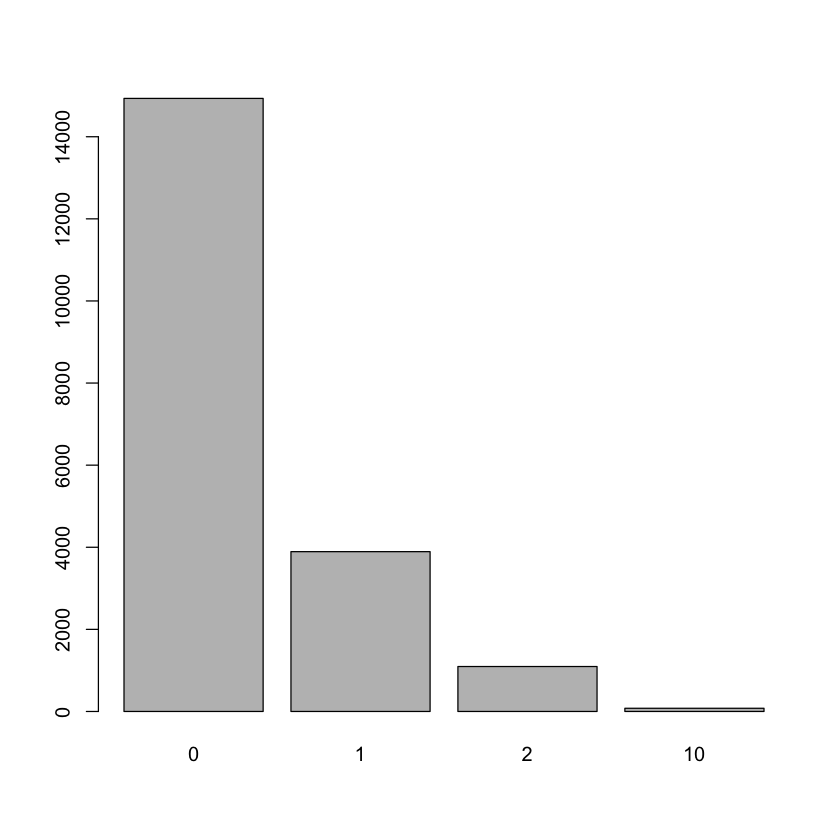

In [17]:
barplot(table(new_localizzazione_incidente))

In [18]:
tabella_pav_tipo_strada <- table(pavimentazione, new_localizzazione_incidente)
tabella_pav_tipo_strada

              new_localizzazione_incidente
pavimentazione     0     1     2    10
       good    14840  3860  1094    70
       bad        70    21     1     0
       non-pav    24    12     0     8

In [19]:
table(pavimentazione)

pavimentazione
   good     bad non-pav 
  19864      92      44 

**Considerazioni**: il numero di strade segnate come sdrucciolevoli è talmente basso da non rendere possibile un'analisi. Mi sembra comunque strano che sia così basso - bisognerebbe guardare esattamente alla definizione.

In [20]:
new_localizzazione_incidente <- factor(new_localizzazione_incidente)
levels(new_localizzazione_incidente) <- c("urbana", "extraurbana", "autostrada", "altro")

In [21]:
fondo_stradale <- factor(fondo_stradale)
levels(fondo_stradale) <- c("asciutto", "bagnato", "sdrucciolevole", "ghiacciato", "innevato")

In [22]:
tabella_fondo_tipo_strada <- table(fondo_stradale, new_localizzazione_incidente)
tabella_fondo_tipo_strada

                new_localizzazione_incidente
fondo_stradale   urbana extraurbana autostrada altro
  asciutto        13186        3202        936    64
  bagnato          1579         601        147     9
  sdrucciolevole    112          30          9     5
  ghiacciato         39          39          2     0
  innevato           18          21          1     0

In [23]:
tot_incidenti_urbani = sum(tabella_fondo_tipo_strada[,1])
tot_incidenti_extra_urbani = sum(tabella_fondo_tipo_strada[,2])
tot_incidenti_autostrada = sum(tabella_fondo_tipo_strada[,3])

In [51]:
prob_incidente = array(666, dim=c(nrow(tabella_fondo_tipo_strada), ncol(tabella_fondo_tipo_strada),3))

In [57]:
prob_incidente[1,,1] = "urbana"
prob_incidente[2,,1] = "extraurbana"
prob_incidente[3,,1] = "autostrada"
prob_incidente[4,,1] = "altro"

prob_incidente[,1,2] = "asciutto"
prob_incidente[,2,2] = "bagnato"
prob_incidente[,3,2] = "sdrucciolevole"
prob_incidente[,4,2] = "ghiacciato"
prob_incidente[,5,2] = "innevato"

ERROR: Error in prob_incidente[1, , 1] = 2: incorrect number of subscripts


In [24]:
prob_incidente_per_acqua_urbano = tabella_fondo_tipo_strada[2]/tot_incidenti_urbani
cat("Probabilità incidente per fondo bagnato in strada urbana", as.integer(prob_incidente_per_acqua_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_urbano = tabella_fondo_tipo_strada[4]/tot_incidenti_urbani
cat("Probabilità incidente per fondo ghiacciato in strada urbana", as.integer(prob_incidente_per_ghiacciato_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada urbana 10.57 %
Probabilità incidente per fondo ghiacciato in strada urbana 0.26 %

In [25]:
prob_incidente_per_acqua_extra_urbano = tabella_fondo_tipo_strada[2,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo bagnato in strada extra urbana", as.integer(prob_incidente_per_acqua_extra_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_extra_urbano = tabella_fondo_tipo_strada[4,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo ghiacciato in strada extra urbana", as.integer(prob_incidente_per_ghiacciato_extra_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada extra urbana 15.43 %
Probabilità incidente per fondo ghiacciato in strada extra urbana 1 %

Quello che si dovrebbe ora calcolare è di andare a vedere se effettivamente questi due fenomeno sono dovuti abbastanza diversi. Ovvero devo fare un qualche test di confronto, e.g. chi-quadro. 

Ci ritorno quando sarò in grado di farlo.

Sarebbe carino mettere un plot in 3 dimensioni per mostrare le tabelle bivariate che sono state prodotte sopra.

Calcolo gli intervalli di confidenza per le probabilità calcolate sopra.

---- 
### Confidence Intervals

Con un confidence level del 95%, l'intervallo di probabilità per i vari tipi di incidente è

In [38]:
confidence_level = 0.99

In [60]:
confidence_interval_acqua_urbano =  qnorm(confidence_level+(1-confidence_level)/2) * sqrt(prob_incidente_per_acqua_urbano*(1-prob_incidente_per_acqua_urbano)/SAMPLE_SIZE)

cat("Intervallo di confidenza al", confidence_level*100,"% per incidenti su fondo bagnato in strada urbana:(", 
      as.integer(prob_incidente_per_acqua_urbano*10000)/100,"±",
        as.integer(confidence_interval_acqua_urbano*10000)/100,")%")

Intervallo di confidenza al 99 % per incidenti su fondo bagnato in strada urbana:( 10.57 ± 0.56 )%

**Nota importante** La funzione `qnorm` rimanda solamente l'inverso dell'integrale sotto la Gaussiana (ovvero il valore $Z$ associato a un certo quantile) per una coda. Ovvero, per avere uno $Z$ associato a un calcolo di intervallo, come quello che dobbiamo fare, dobbiamo fare considerazioni algebriche.

In particolare, se noi vogliamo il 95% su due cose, su una coda questo corrisponde a richiedere il 97.5% (infatti, le due code sono entrambe del 2.5%; ovvero aggiungo questo valore per vedere dove arrivo a "destra").

-----
### Analisi autostradale

Per prima cosa vado a selezionare, all'interno del mio campione, solamente i dati relativi ad autostrada.

**nota**: Tra le autostrade, configurano anche delle denominazioni tipo `R03`: sono riferiti a dei pezzi di raccordo. Cercando velocemente online si chiarisce facilmente.

La funzione `droplevels` serve per escludere tutti i livelli non utilizzati, i.e. i nomi delle strade normali.

In [84]:
incidenti_in_autostrada = sample_data[which(new_localizzazione_incidente=="autostrada"),]

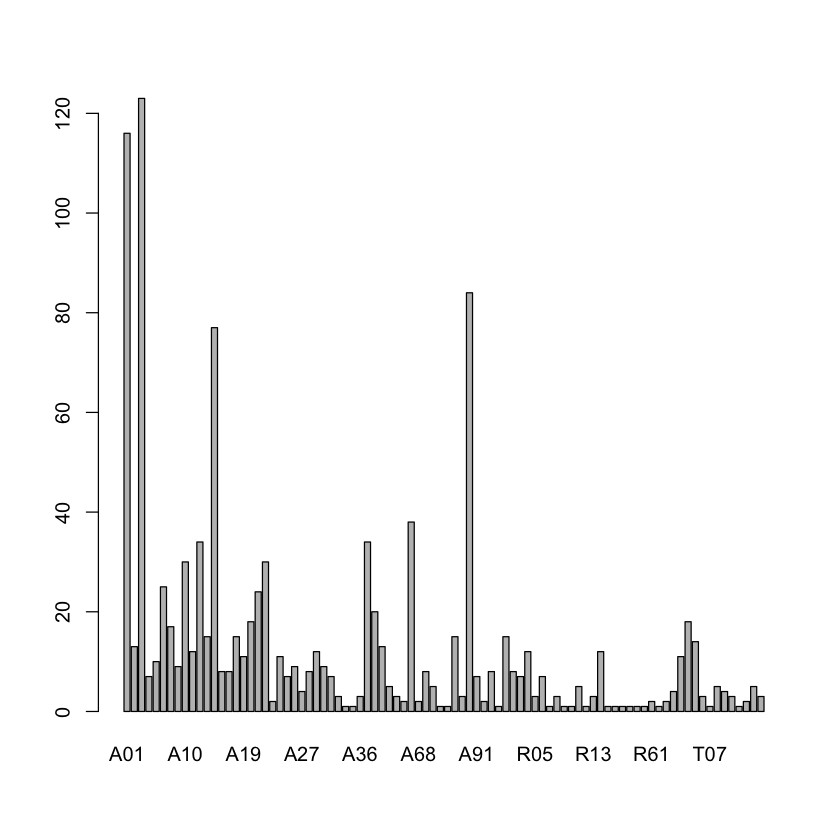

In [85]:
barplot(table(droplevels(incidenti_in_autostrada$denominazione_della_strada)))

Sono riuscito a trovare come poter collegare il nome dell'autostrada. Online sono inoltre presenti i dati geografici (si chiamano _shapefile_) relativi alle autostrade. Penso che, una volta capito quello che si deve fare, non sia difficile riportare questi dati su una mappa geografica.

Servono ovviamente le apposite mappe.